In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [18]:
trump_f = [0.15, 0.15,0.03, 0.05, 0.11, 0.15, 0.06, 0.18, 0.24, 0.29, 0.13, 0.09, .11]
t_avg = sum(trump_f) / len(trump_f)
clinton_f = [0.11, 0.0, 0.06, -0.05, -0.03, -0.04, -0.01, -0.03, -.02, -.09, -.11]
c_avg = sum(clinton_f) / len(clinton_f)

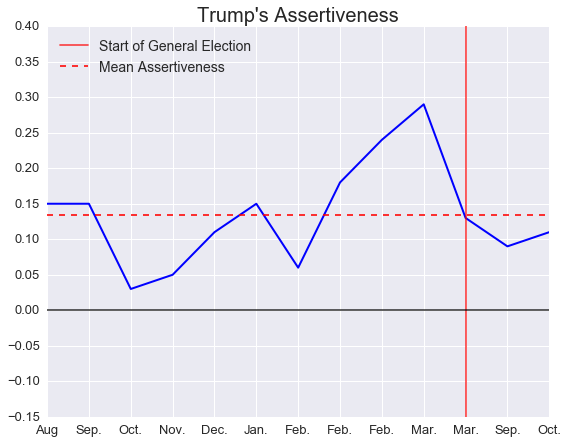

In [89]:
fig, ax1 = plt.subplots(figsize=(9, 7))

ax1.plot(trump_f, color='blue', lw=2)
ax1.set_title('Trump\'s Assertiveness', fontsize=20)
ax1.set_ylim([-.15, .4])
ax1.axvline(10, color='red', alpha=0.7, linestyle = "-", label = "Start of General Election")
ax1.axhline(0, color='black', alpha=0.7, linestyle = "-")
ax1.axhline(t_avg, color='red', alpha=0.9, linestyle = "--", label = 'Mean Assertiveness')
ax1.locator_params(nbins=13)
ax1.set_xticklabels(('Aug', 'Sep.', 'Oct.', 'Nov.', 'Dec.', 'Jan.', 'Feb.', 'Feb.', 'Feb.', 'Mar.', 'Mar.', 'Sep.', 'Oct.'))
plt.tick_params(axis='both', which='major', labelsize=13)
plt.tick_params(axis='both', which='minor', labelsize=13)
plt.legend(loc = 'upper left', prop={'size':14})

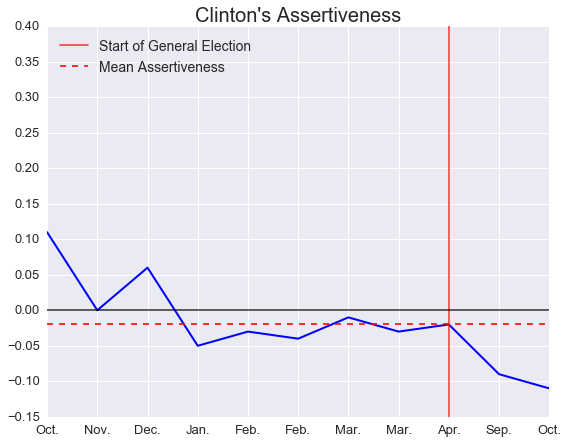

In [90]:
fig, ax1 = plt.subplots(figsize=(9, 7))
ax1.plot(clinton_f, color='blue', lw=2)
ax1.set_title('Clinton\'s Assertiveness', fontsize=20)
ax1.set_ylim([-.15, .4])
ax1.axvline(8, color='red', alpha=0.7, linestyle = "-", label = "Start of General Election")
ax1.axhline(0, color='black', alpha=0.7, linestyle = "-")
ax1.axhline(c_avg, color='red', alpha=0.9, linestyle = "--", label = 'Mean Assertiveness')
ax1.locator_params(nbins=11)
ax1.set_xticklabels(('Oct.', 'Nov.', 'Dec.', 'Jan.', 'Feb.', 'Feb.', 'Mar.', 'Mar.', 'Apr.', 'Sep.', 'Oct.'))
plt.tick_params(axis='both', which='major', labelsize=13)
plt.tick_params(axis='both', which='minor', labelsize=13)
plt.legend(loc = 'upper left', prop={'size':14})